In [3]:
import sqlite3

cnx = sqlite3.connect("test.db")
cursor = cnx.cursor()


# 1571. Warehouse Manager
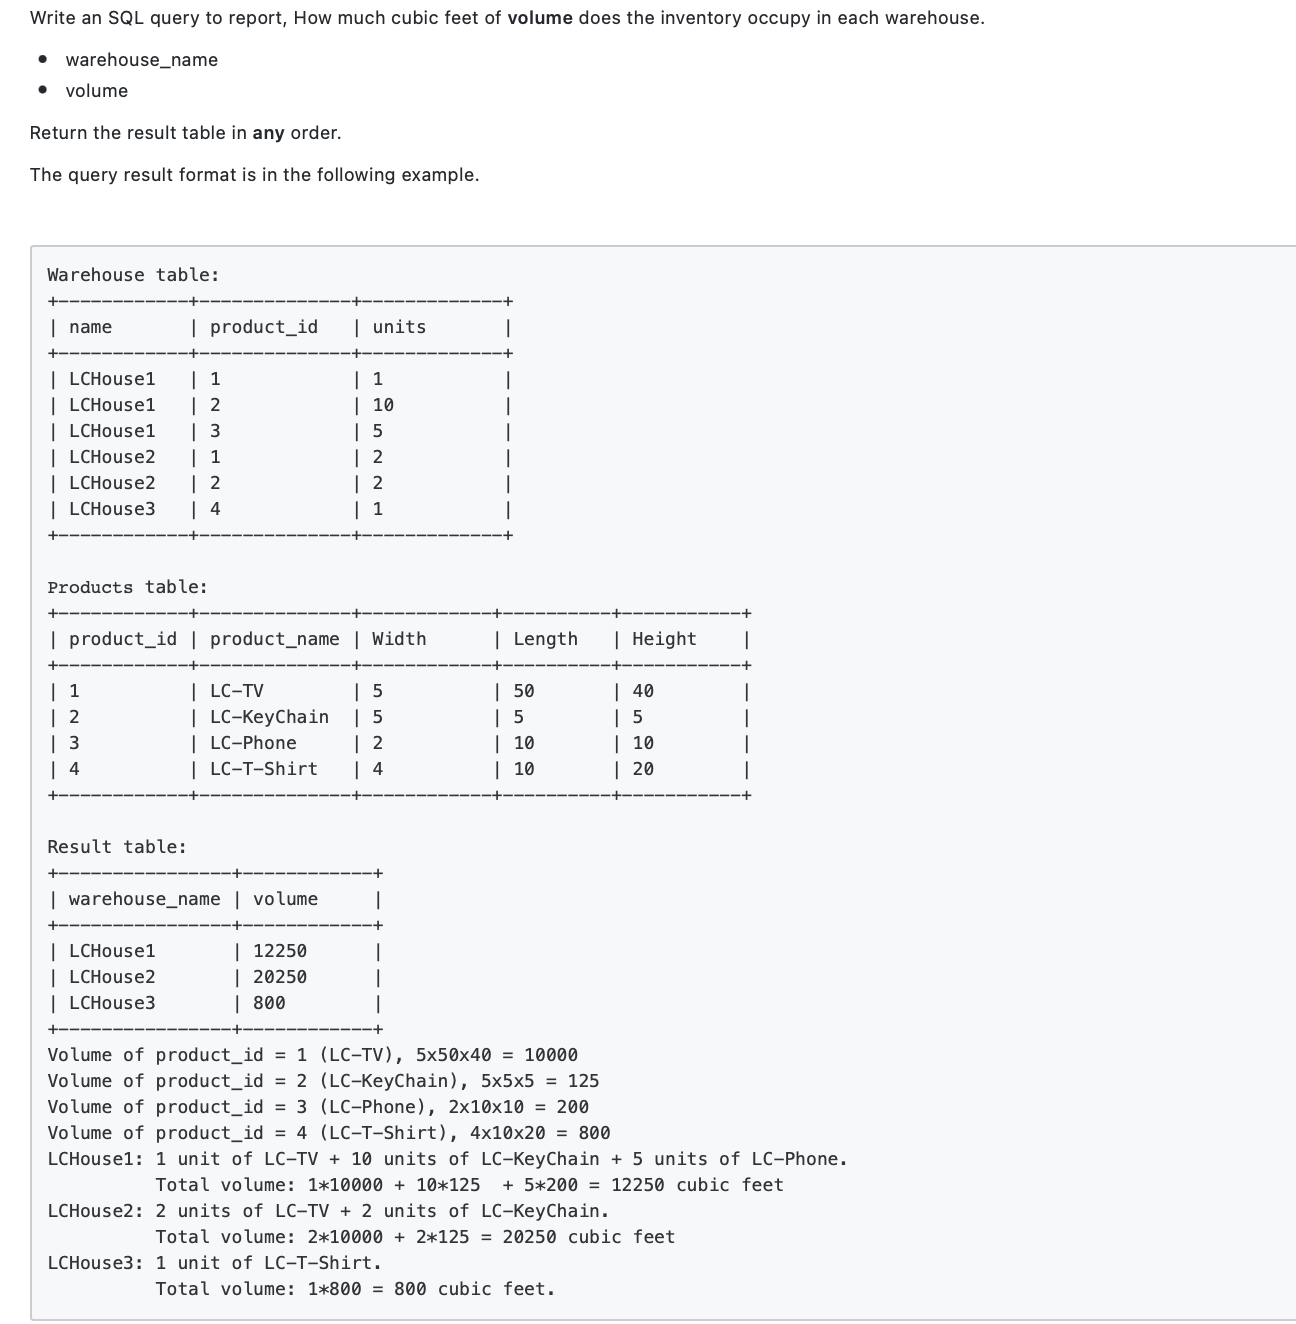

In [5]:
query = '''SELECT name as warehouse_name, SUM(Width*Length*Height*units)
 FROM Products4 p JOIN WareHouse w 
 ON p.product_id = w.product_id
GROUP BY name'''
cursor.execute(query)
for row in cursor:
    print(row) 

('LCHouse1', 12250)
('LCHouse2', 20250)
('LCHouse3', 800)


# 1661. Average Time of Process per Machine
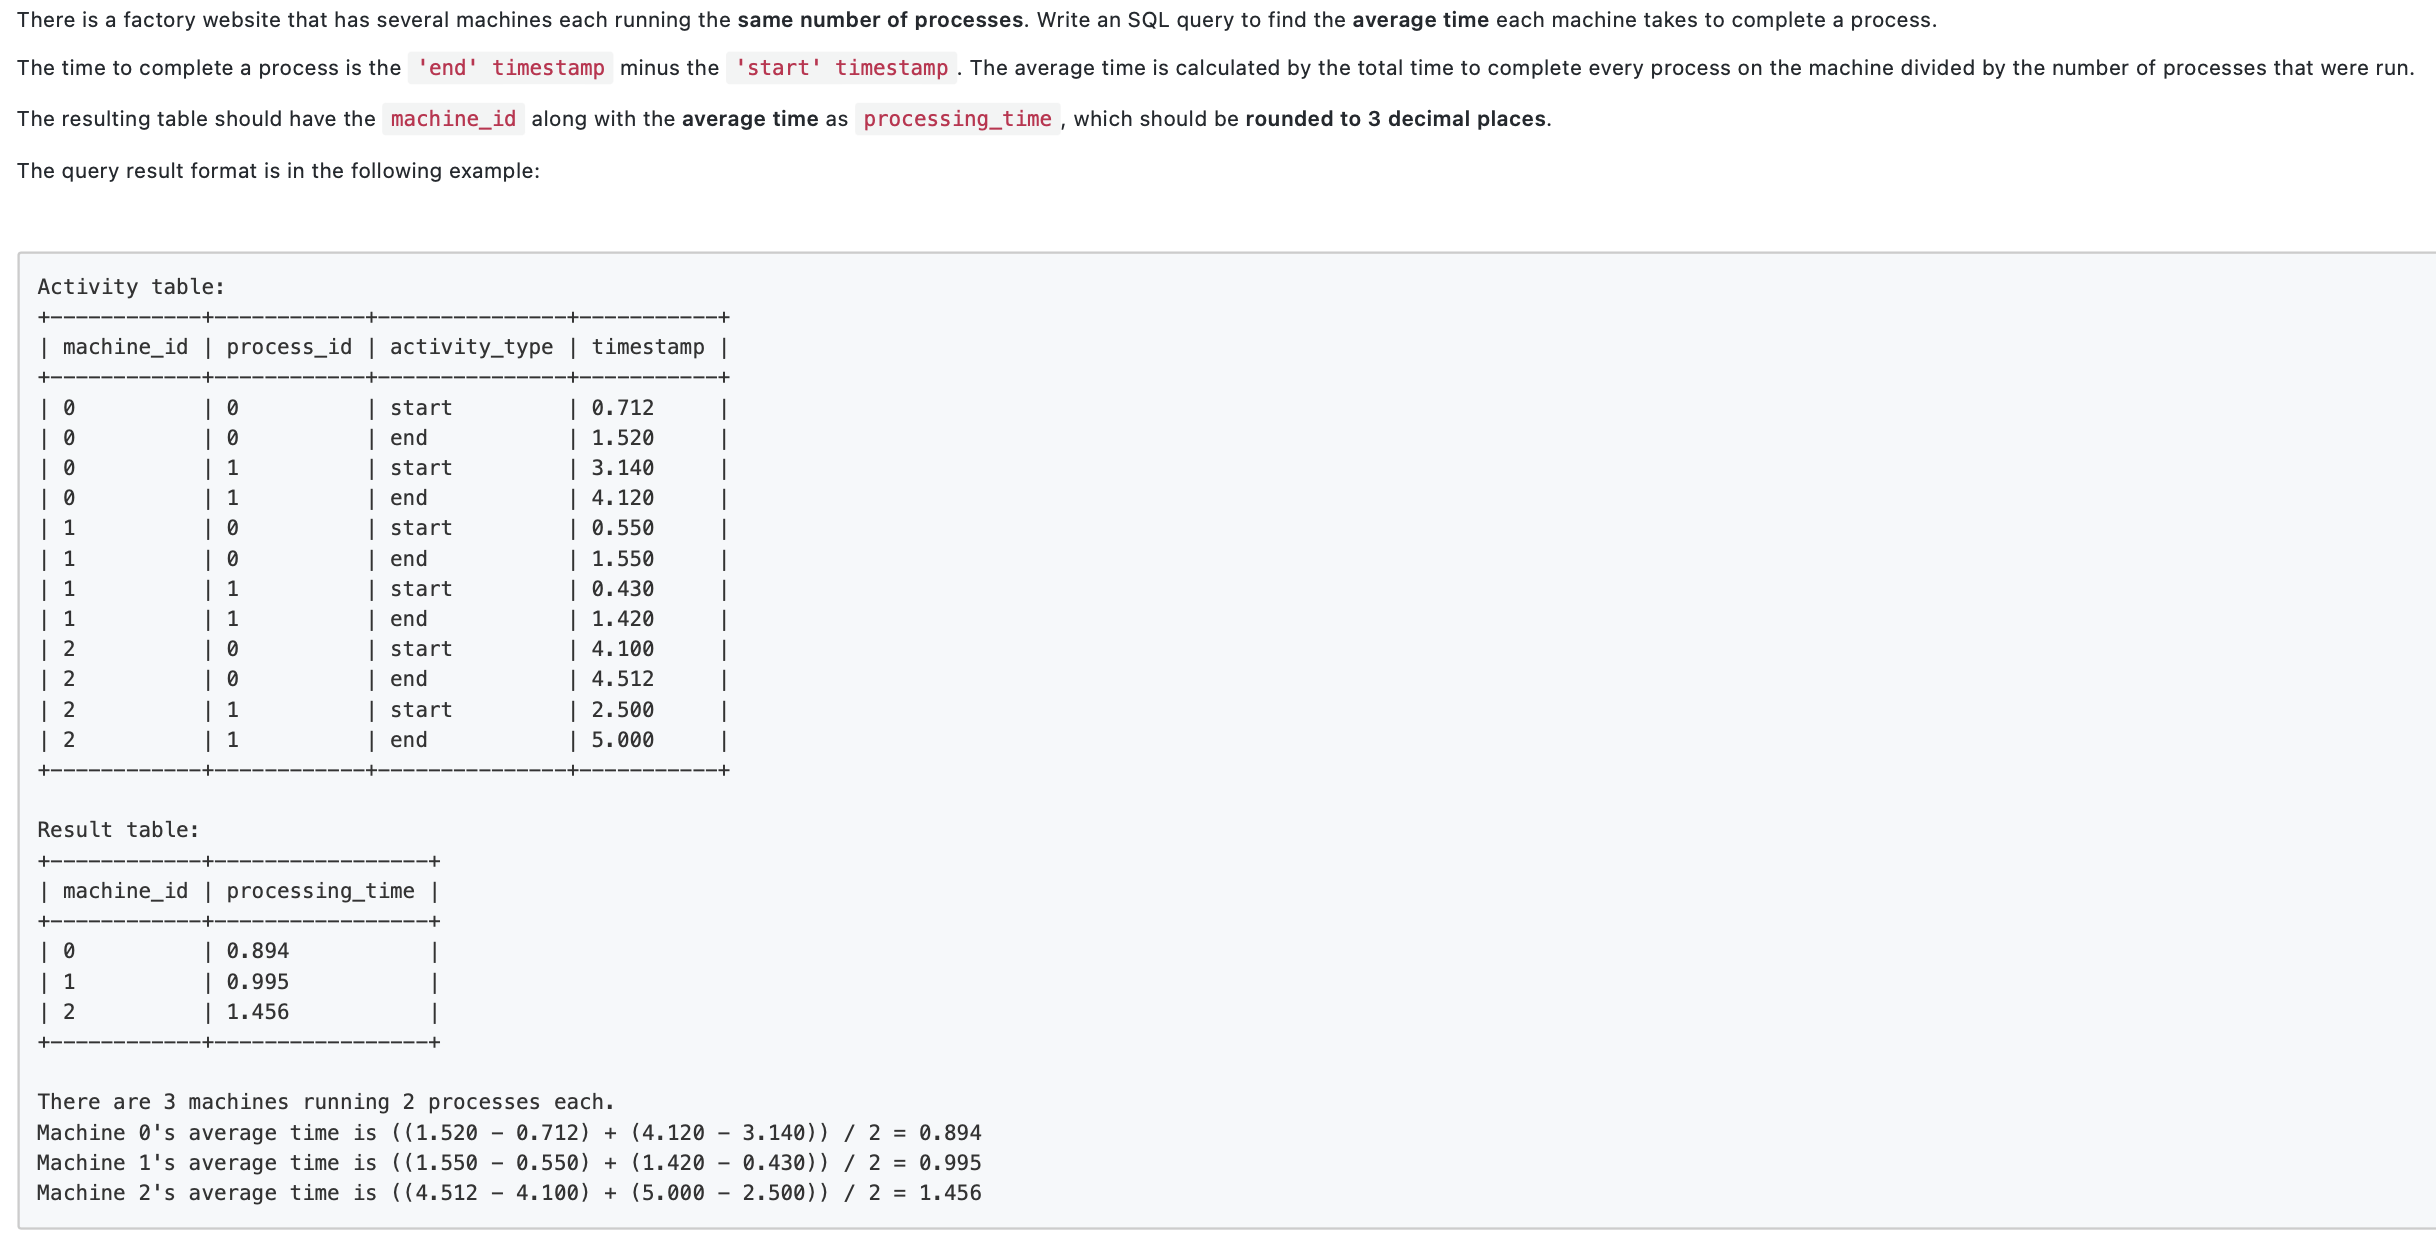

In [6]:
query = '''SELECT a.machine_id, AVG(b.timestamp-a.timestamp) as processing_time
FROM Activity4 a JOIN Activity4 b 
ON a.machine_id=b.machine_id and a.process_id=b.process_id
WHERE a.activity_type = 'start' and b.activity_type = 'end'
GROUP BY a.machine_id'''
cursor.execute(query)
for row in cursor:
    print(row) 

(0, 0.894)
(1, 0.995)
(2, 1.456)


# 1393. Capital Gain/Loss
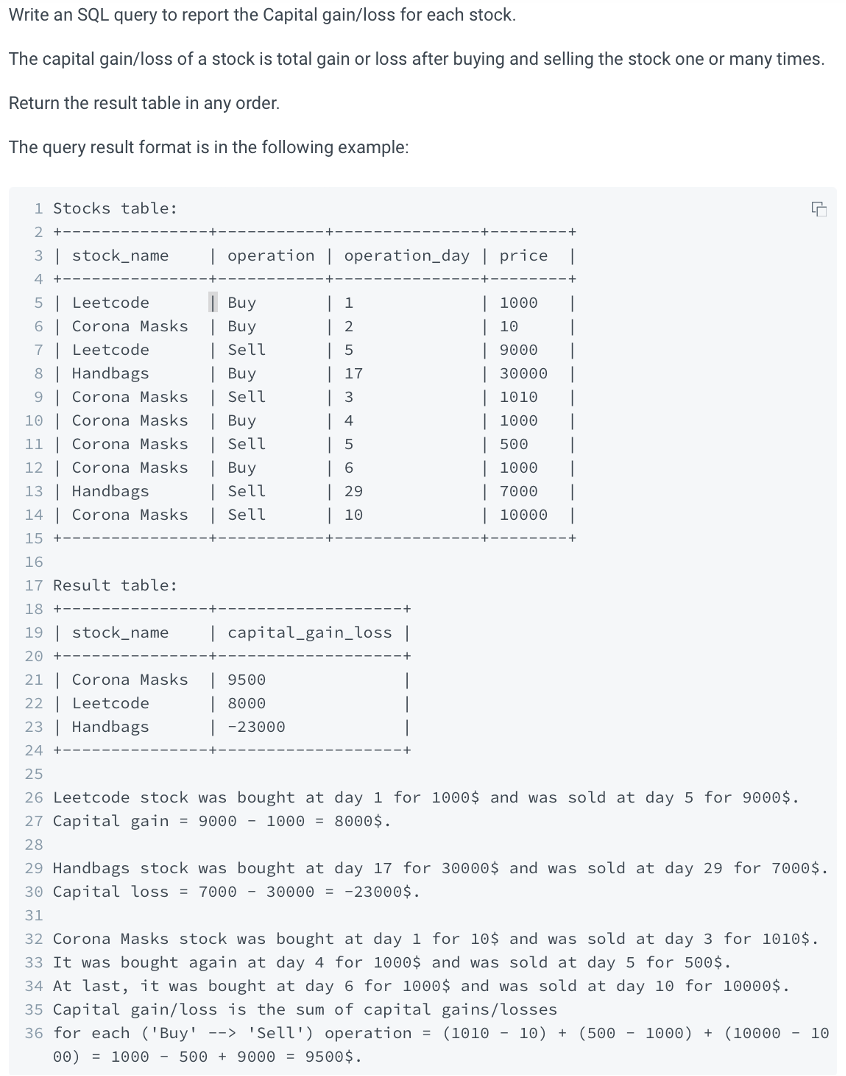

In [7]:
query = '''SELECT stock_name, 
sum(IIF(operation = 'Sell', price, 0))- sum(IIF(operation = 'Buy', price, 0)) as capital_gain_loss
FROM Stocks GROUP BY stock_name'''
cursor.execute(query)
for row in cursor:
    print(row) 

('Corona Masks', 9500)
('Handbags', -23000)
('Leetcode', 8000)


# 1212. Team Scores in Football Tournament
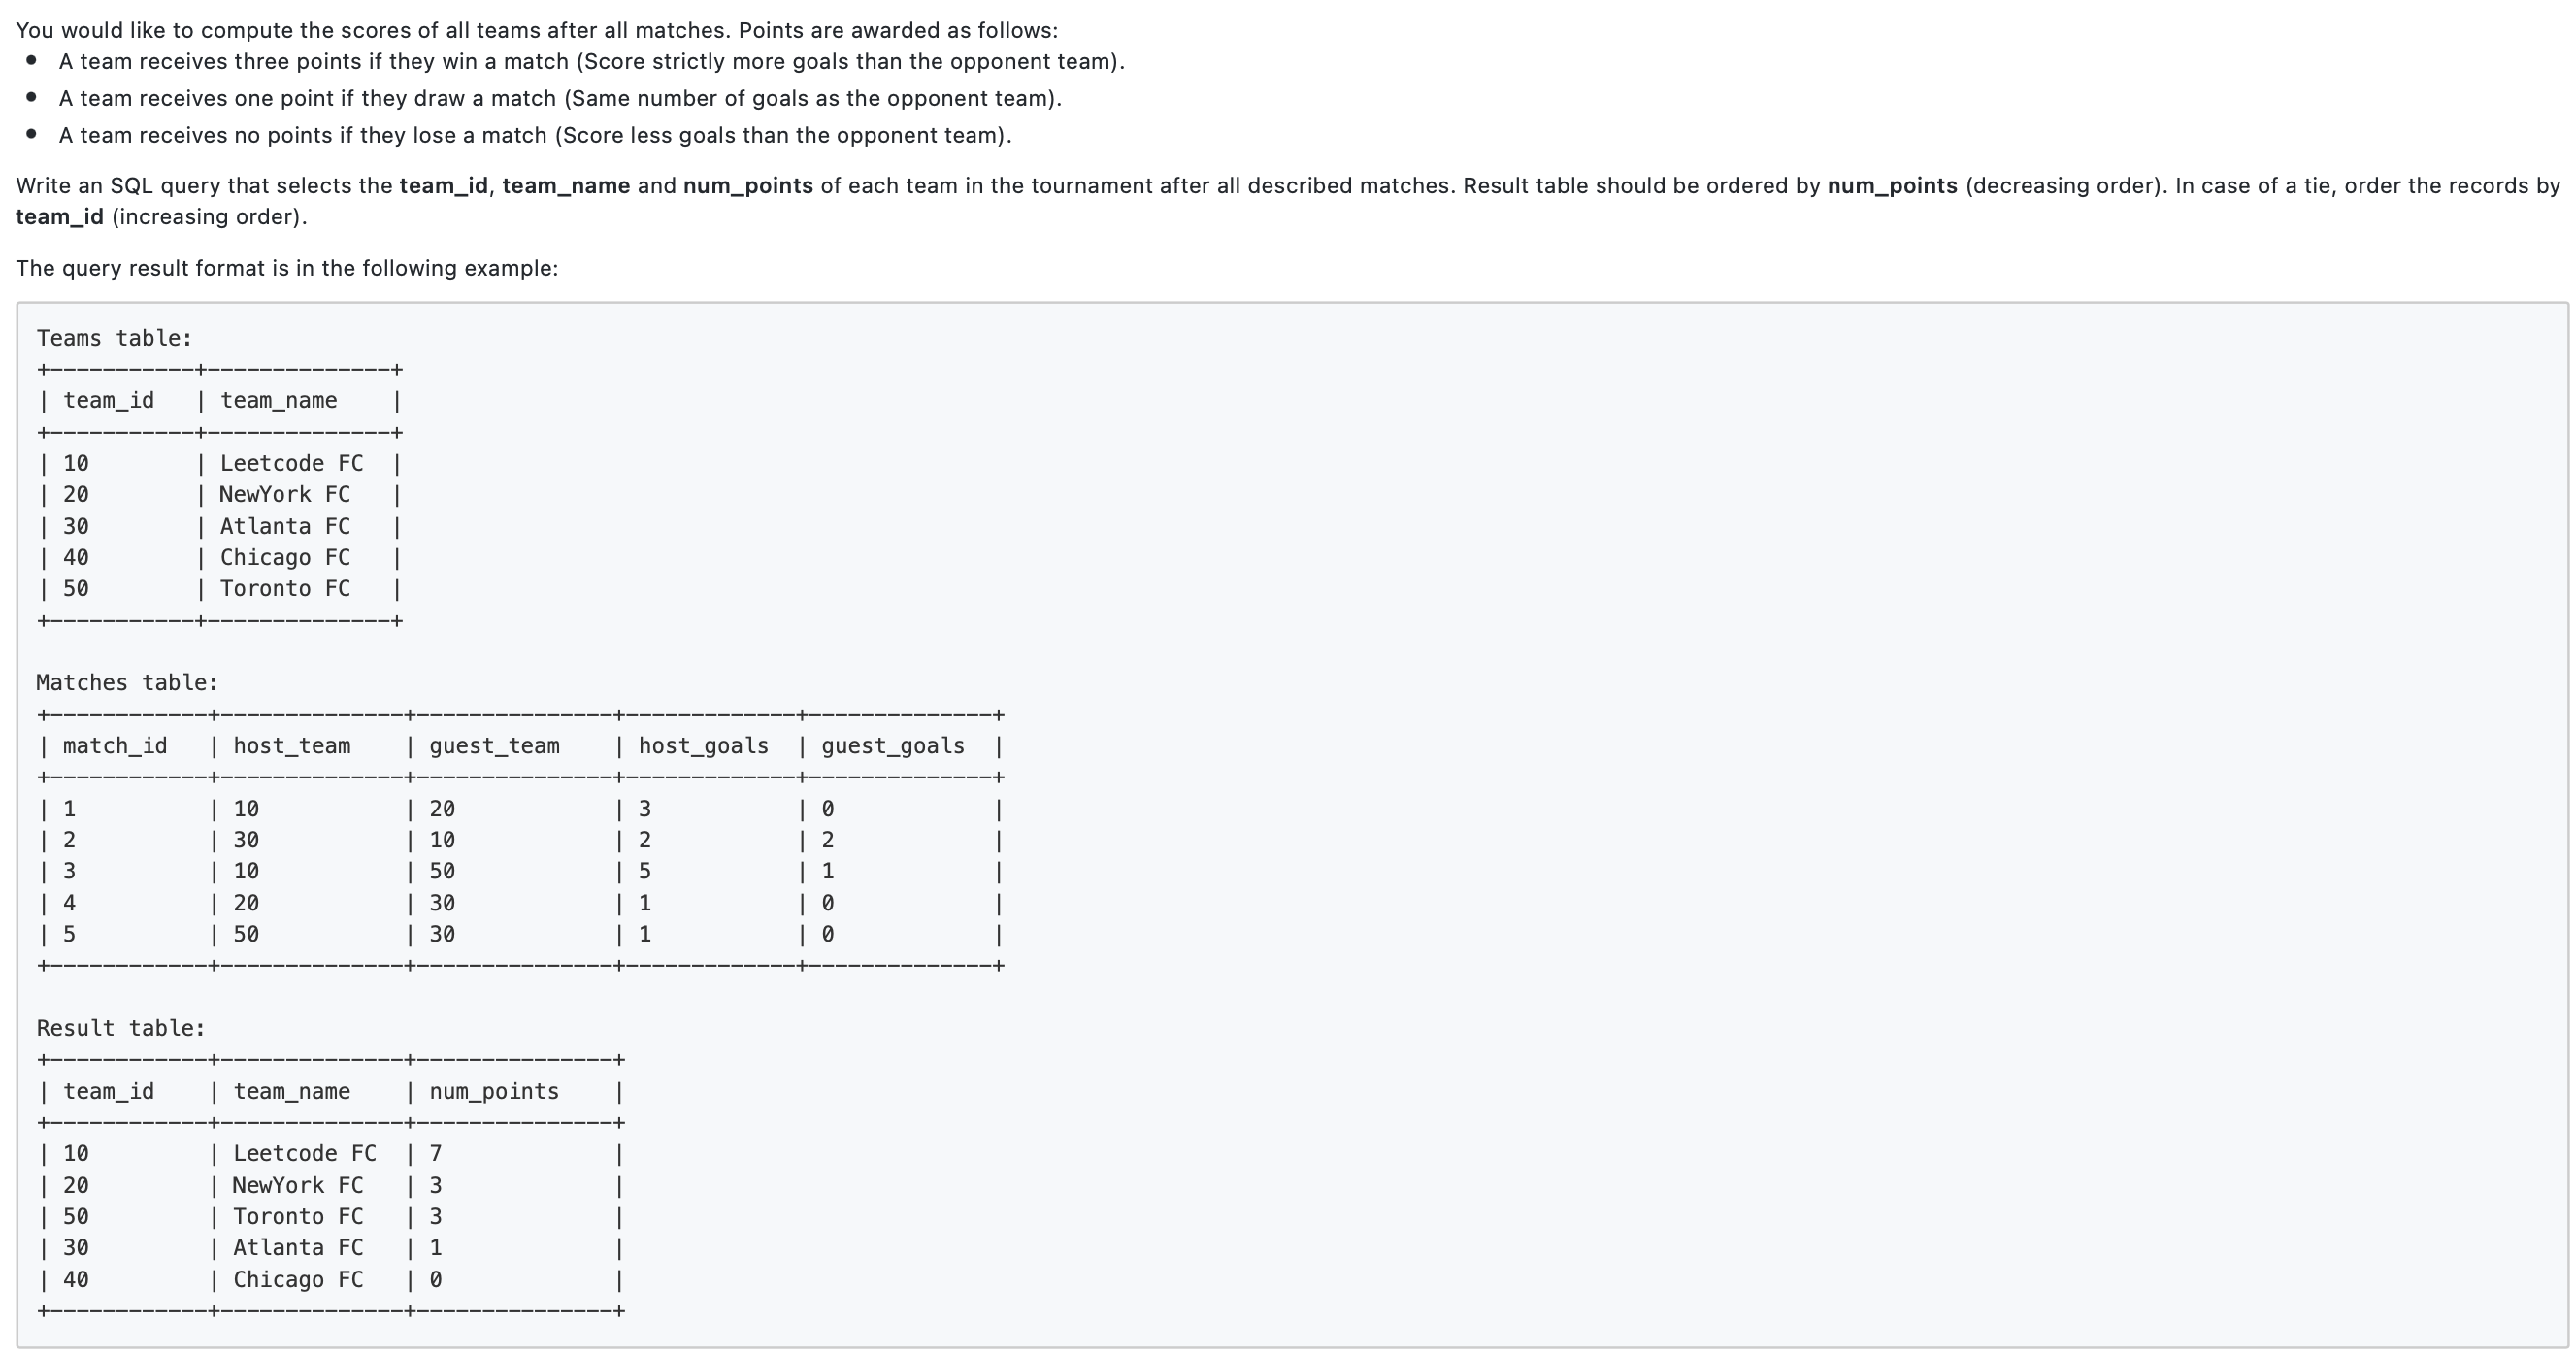

In [17]:
query = '''SELECT team_id, team_name,
SUM(IIF(host_team = team_id AND host_goals>guest_goals, 3, 0)) +
SUM(IIF(guest_team = team_id AND host_goals<guest_goals, 3, 0)) +
SUM(IIF(host_team = team_id AND host_goals=guest_goals, 1, 0)) +
SUM(IIF(guest_team = team_id AND host_goals=guest_goals, 1, 0)) as num_points
FROM Teams t LEFT JOIN matches m ON host_team=team_id OR guest_team=team_id
GROUP BY team_name 
ORDER BY num_points DESC
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(10, 'Leetcode FC', 7)
(50, 'Toronto FC', 3)
(20, 'NewYork FC', 3)
(30, 'Atlanta FC', 1)
(40, 'Chicago FC', 0)


In [8]:
query = '''
SELECT a.team_id, a.team_name, IFNULL(SUM(NUM_POINTS), 0) AS NUM_POINTS FROM 
Teams a LEFT JOIN 
(SELECT host_team as team_id,
CASE WHEN host_goals > guest_goals THEN 3
            WHEN host_goals < guest_goals THEN 0
            ELSE 1 END AS NUM_POINTS
FROM Matches
UNION ALL
SELECT guest_team as team_id,
CASE WHEN host_goals > guest_goals THEN 0
            WHEN host_goals < guest_goals THEN 3
            ELSE 1 END AS NUM_POINTS
FROM Matches) b 
ON a.team_id = b.team_id
GROUP BY a.team_id
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(10, 'Leetcode FC', 7)
(20, 'NewYork FC', 3)
(30, 'Atlanta FC', 1)
(40, 'Chicago FC', 0)
(50, 'Toronto FC', 3)


# 610. Triangle Judgement 
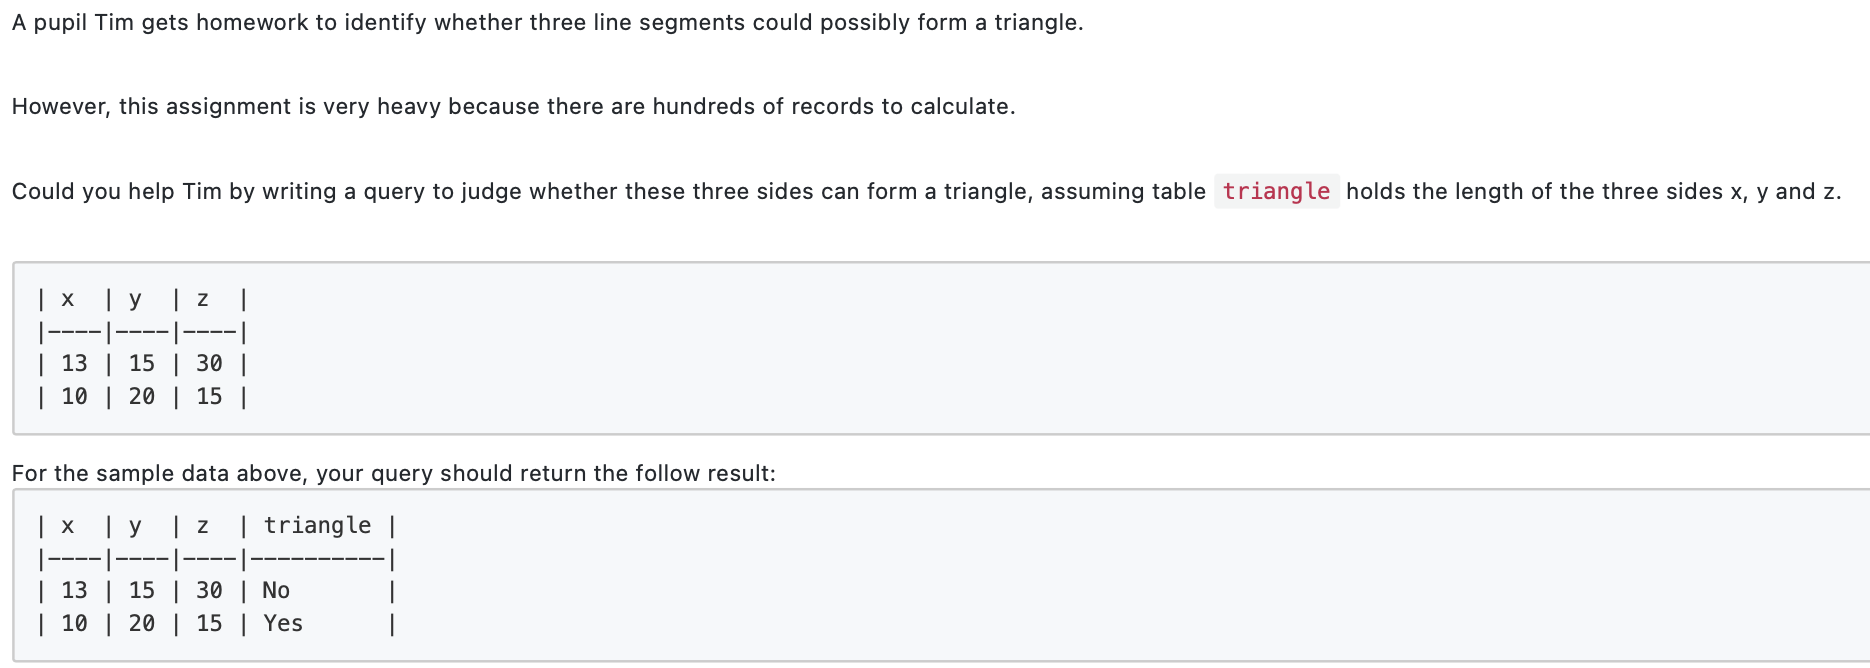

In [19]:
query = '''SELECT *, IIF(x+y>z AND x+z>y AND y+z>x, 'Yes','No') FROM triangle'''
cursor.execute(query)
for row in cursor:
    print(row) 

(13, 15, 30, 'No')
(10, 20, 15, 'Yes')


# 1173. Immediate Food Delivery I
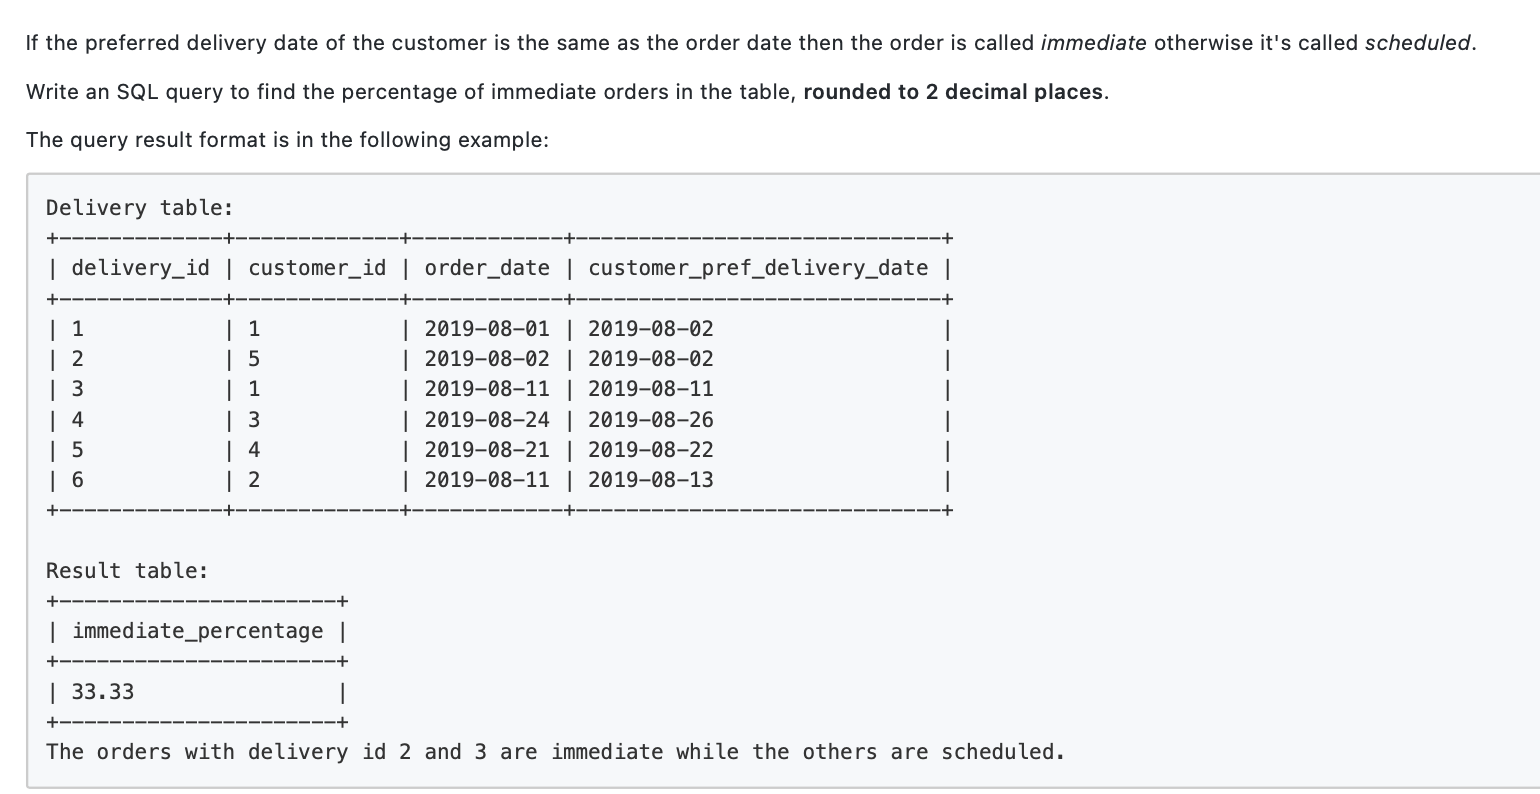

In [10]:
query = '''SELECT round(sum(order_date = customer_pref_delivery_date)*1.0/count(*),2) as immediate_percentage 
FROM Delivery 
'''
cursor.execute(query)
for row in cursor:
    print(row)

(0.33,)


# 1204. Last Person to Fit in the Elevator
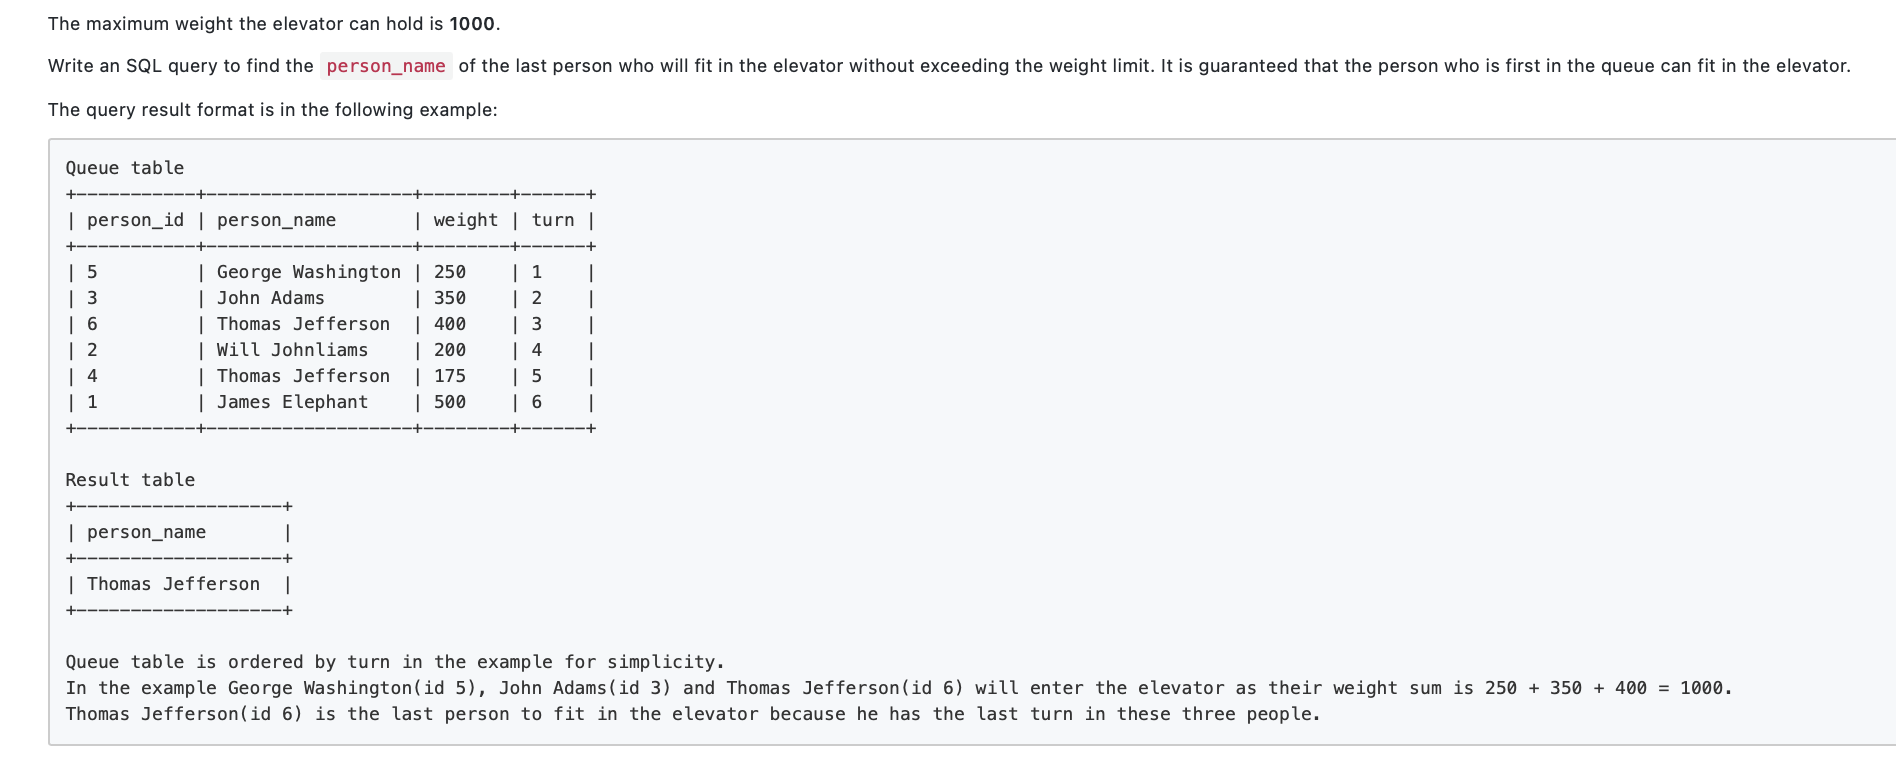

In [12]:
query = '''
SELECT person_name FROM
(SELECT *, sum(weight) over (order by turn) sum FROM Queue)
WHERE sum <=1000 ORDER BY sum DESC LIMIT 1
'''
cursor.execute(query)
for row in cursor:
    print(row)

('Thomas Jefferson',)


# 1699. Number of Calls Between Two Persons
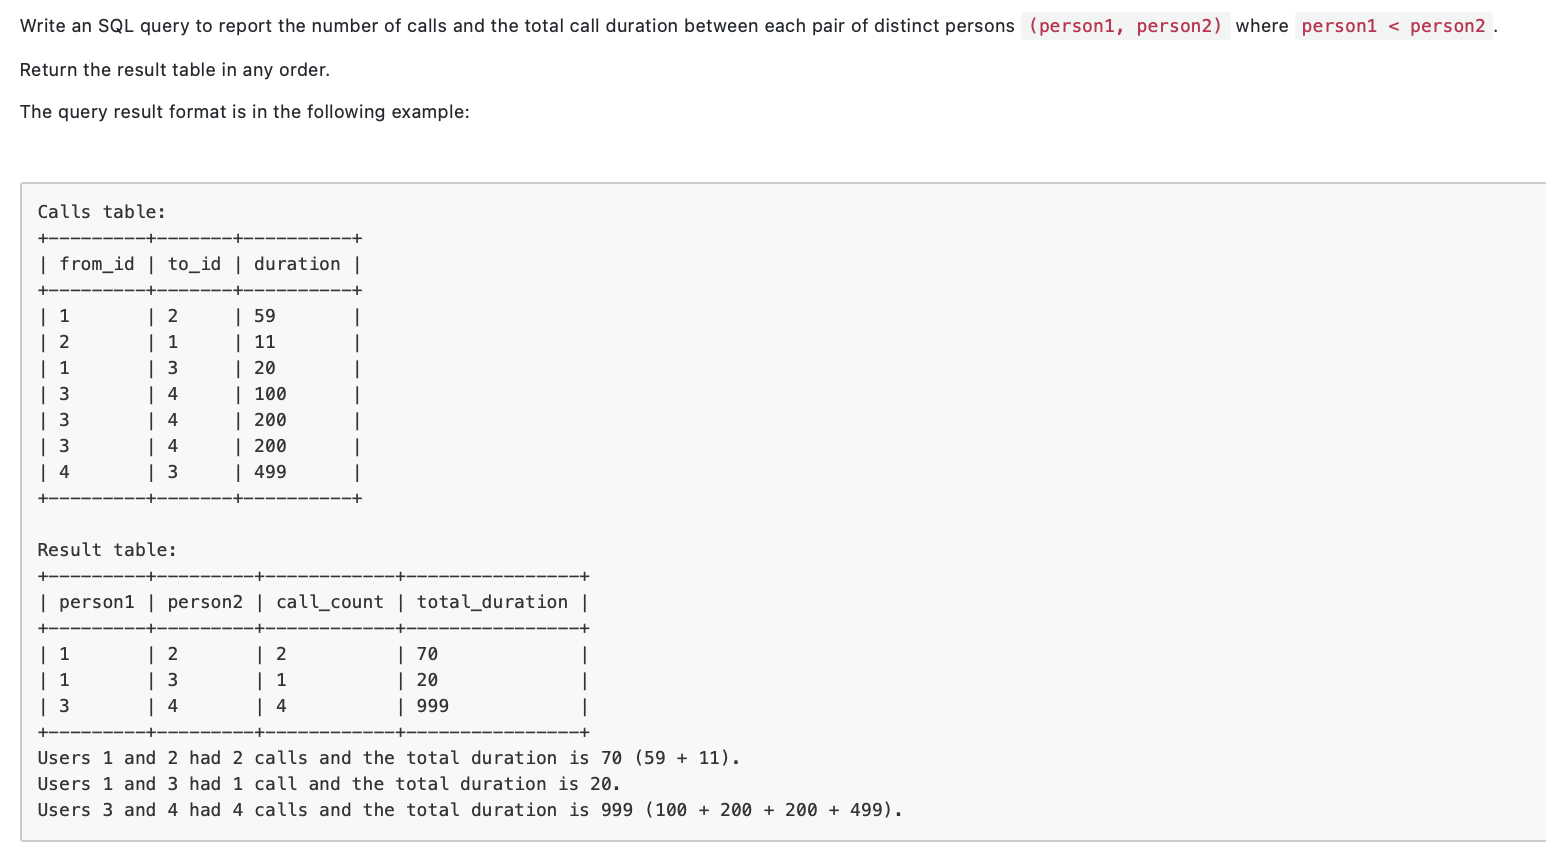

In [26]:
query = '''SELECT min(from_id, to_id) as person_1, max(from_id, to_id) as person_2,
count(*) as call_count, sum(duration) as total_duration
FROM Calls2 
group by person_1, person_2
'''
cursor.execute(query)
for row in cursor:
    print(row)

(1, 2, 2, 70)
(1, 3, 1, 20)
(3, 4, 4, 999)
